# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- Nama: Muhamad Syafe'ie
- Email: zhavei.vei@gmail.com
- Id Dicoding: zhavei

## Menentukan Pertanyaan Bisnis

#### 1. Apakah kategori produk yang paling banyak diminati dan tidak diminati?
#### 2. Apa 5 kategori produk terlaris berdasarkan keuntungan?
#### 3. Bagaimanakah performa seller berdasarkan state dan city?
#### 4. dimanakah pesanan terbanyak berdasarkan kota?



## Mengimport semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')


## Data Wrangling

### Gathering Data

In [2]:
customers = pd.read_csv('data/customers_dataset.csv')
orders = pd.read_csv('data/orders_dataset.csv')
payments = pd.read_csv('data/order_payments_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
products = pd.read_csv('data/products_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')
products_eng = pd.read_csv('data/product_category_name_translation.csv')

csv_files = [
    'customers_dataset.csv',
    'orders_dataset.csv',
    'order_payments_dataset.csv',
    'order_items_dataset.csv',
    'products_dataset.csv',
    'sellers_dataset.csv',
    'product_category_name_translation.csv'
]

data = {'orders': orders,
        'items': order_items,
        'products': products,
        'payments': payments,
        'customers': customers,
        'sellers': sellers,
        'category': products_eng}

# `csv_files` `data` di gunakan untuk proses gathering data, asenssing data dan cleaning data
for file in csv_files:
    df = pd.read_csv('data/' + file)
    display(file, df.head())
    

'customers_dataset.csv'

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


'orders_dataset.csv'

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


'order_payments_dataset.csv'

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


'order_items_dataset.csv'

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


'products_dataset.csv'

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


'sellers_dataset.csv'

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


'product_category_name_translation.csv'

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

Sebelum melakukan analisis data, perlu dilakukan pemeriksaan data terlebih dahulu. Pemeriksaan data meliputi pengecekan tipe data, missing value, duplikat data, dan parameter statistik.

#### check info

In [3]:
for file in csv_files:
    df = pd.read_csv('data/' + file)
    print(f"\n{file} check info:")
    display(df.info())


customers_dataset.csv check info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None


orders_dataset.csv check info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None


order_payments_dataset.csv check info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None


order_items_dataset.csv check info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None


products_dataset.csv check info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None


sellers_dataset.csv check info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None


product_category_name_translation.csv check info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

banyak data `date` bertipe object seharusnya ia merupakan data `date`

#### check null data

In [4]:
for file in csv_files:
    df = pd.read_csv('data/' + file)
    print(f"\n{file} check null:")
    display(df.isna().sum())


customers_dataset.csv check null:


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


orders_dataset.csv check null:


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


order_payments_dataset.csv check null:


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


order_items_dataset.csv check null:


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


products_dataset.csv check null:


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


sellers_dataset.csv check null:


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


product_category_name_translation.csv check null:


product_category_name            0
product_category_name_english    0
dtype: int64

perlu di analisa lebih lanjut terkait table `order` mengapa memiliki banyak missing values.

#### check duplikasi data

In [5]:
for file in csv_files:
    df = pd.read_csv('data/' + file)
    print(f"\n{file} check duplikat:")
    print(f"jumlah duplikasi {file} : ", df.duplicated().sum())



customers_dataset.csv check duplikat:
jumlah duplikasi customers_dataset.csv :  0

orders_dataset.csv check duplikat:
jumlah duplikasi orders_dataset.csv :  0

order_payments_dataset.csv check duplikat:
jumlah duplikasi order_payments_dataset.csv :  0

order_items_dataset.csv check duplikat:
jumlah duplikasi order_items_dataset.csv :  0

products_dataset.csv check duplikat:
jumlah duplikasi products_dataset.csv :  0

sellers_dataset.csv check duplikat:
jumlah duplikasi sellers_dataset.csv :  0

product_category_name_translation.csv check duplikat:
jumlah duplikasi product_category_name_translation.csv :  0


terlihat hanya `geo location` saja yg memiliki duplikat ini di karenakan costomer yg sama sering melakukan transaksi.

### Cleaning Data

membersihkan dan menggabungkan antara data customer, order_item, orders, products, seller, payments. 

In [6]:
# melakukan merge data yang akan di gunakan
# Merge the order items and orders datasets
data = pd.merge(order_items, orders, on='order_id')

# Merge in the customer data 
data = pd.merge(data, customers, on='customer_id')  

# Merge in the product data
data = pd.merge(data, products, on='product_id')

# merge in seller data
data = pd.merge(data, sellers, on='seller_id')

# merge in payments data
data = pd.merge(data, payments, on='order_id')

# merge in category name english
combine_data = pd.merge(data, products_eng, on='product_category_name')

display(combine_data.head())
display(combine_data.info())


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,9.0,14.0,27277,volta redonda,SP,1,credit_card,2,72.19,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,9.0,14.0,27277,volta redonda,SP,1,boleto,1,73.86,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,9.0,14.0,27277,volta redonda,SP,1,credit_card,2,83.23,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,9.0,14.0,27277,volta redonda,SP,1,credit_card,3,75.07,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,9.0,14.0,27277,volta redonda,SP,1,credit_card,4,72.19,cool_stuff


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115878 entries, 0 to 115877
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115878 non-null  object 
 1   order_item_id                  115878 non-null  int64  
 2   product_id                     115878 non-null  object 
 3   seller_id                      115878 non-null  object 
 4   shipping_limit_date            115878 non-null  object 
 5   price                          115878 non-null  float64
 6   freight_value                  115878 non-null  float64
 7   customer_id                    115878 non-null  object 
 8   order_status                   115878 non-null  object 
 9   order_purchase_timestamp       115878 non-null  object 
 10  order_approved_at              115864 non-null  object 
 11  order_delivered_carrier_date   114673 non-null  object 
 12  order_delivered_customer_date 

None

banyak data `date` yang masih bertipe `object` mari kita ubah

In [7]:
#data cleaning : mengganti tipe data yang sesuai
combine_data['order_purchase_timestamp'] = pd.to_datetime(combine_data['order_purchase_timestamp'])
combine_data['order_approved_at'] = pd.to_datetime(combine_data['order_approved_at'])
combine_data['order_delivered_carrier_date'] = pd.to_datetime(combine_data['order_delivered_carrier_date'])
combine_data['order_delivered_customer_date'] = pd.to_datetime(combine_data['order_delivered_customer_date'])
combine_data['order_estimated_delivery_date'] = pd.to_datetime(combine_data['order_estimated_delivery_date'])
combine_data['shipping_limit_date'] = pd.to_datetime(combine_data['shipping_limit_date'])

combine_data['customer_zip_code_prefix'] = combine_data['customer_zip_code_prefix'].astype('str')
combine_data['seller_zip_code_prefix'] = combine_data['seller_zip_code_prefix'].astype('str')
combine_data['order_item_id'] = combine_data['order_item_id'].astype('str')

combine_data['customer_id'] = combine_data['customer_id'].astype(str)
combine_data['order_id'] = combine_data['order_id'].astype(str)
combine_data['order_id'] = combine_data['order_id'].astype(str)
combine_data['product_id'] = combine_data['product_id'].astype(str)

combine_data.info()
combine_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115878 entries, 0 to 115877
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115878 non-null  object        
 1   order_item_id                  115878 non-null  object        
 2   product_id                     115878 non-null  object        
 3   seller_id                      115878 non-null  object        
 4   shipping_limit_date            115878 non-null  datetime64[ns]
 5   price                          115878 non-null  float64       
 6   freight_value                  115878 non-null  float64       
 7   customer_id                    115878 non-null  object        
 8   order_status                   115878 non-null  object        
 9   order_purchase_timestamp       115878 non-null  datetime64[ns]
 10  order_approved_at              115864 non-null  datetime64[ns]
 11  

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,9.0,14.0,27277,volta redonda,SP,1,credit_card,2,72.19,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,9.0,14.0,27277,volta redonda,SP,1,boleto,1,73.86,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,9.0,14.0,27277,volta redonda,SP,1,credit_card,2,83.23,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,9.0,14.0,27277,volta redonda,SP,1,credit_card,3,75.07,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,9.0,14.0,27277,volta redonda,SP,1,credit_card,4,72.19,cool_stuff


In [8]:
#Hapus duplicate
combine_data.drop_duplicates(keep='first', inplace=True)
print('check duplikat : ', combine_data.duplicated().sum())

check duplikat :  0


## Exploratory Data Analysis (EDA)

##### 1. Menseleksi data untuk explorasi 

Pada tahap eksplorasi data, yang perlu kita lakukan ialah pemahaman terhadap data agar dapat dianalisis dengan efektif. Hal ini dilakukan dengan melakukan langkah-langkah berikut:

- Memahami struktur data, termasuk tipe data, nilai-nilai yang ada, dan hubungan antar kolom.
- Mengidentifikasi pola dan tren data.
- Menentukan masalah bisnis yang ingin dijawab.
- Memilih kolom-kolom yang menjadi fokus analisis berdasarkan masalah bisnis yang ingin dijawab.

In [9]:
combine_data.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english
count,115878,115878,115878,115878,115878,115878.000000,115878.000000,115878,115878,115878,...,115877.000000,115877.000000,115878,115878,115878,115878.000000,115878,115878.000000,115878.000000,115878
unique,97255,21,32328,3033,NaN,NaN,NaN,97255,7,NaN,...,NaN,NaN,2211,604,23,NaN,4,NaN,NaN,71
top,895ab968e7bb0d5659d16cd74cd1650c,1,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,NaN,270c23a11d024a44c896d1894b261a83,delivered,NaN,...,NaN,NaN,14940,sao paulo,SP,NaN,credit_card,NaN,NaN,bed_bath_table
freq,63,101533,536,2133,NaN,NaN,NaN,63,113384,NaN,...,NaN,NaN,8198,28920,82601,NaN,85523,NaN,NaN,11823
mean,NaN,NaN,NaN,NaN,2018-01-07 01:46:25.035261440,120.924716,20.075868,NaN,NaN,2017-12-31 10:21:34.849332992,...,16.656886,23.110445,NaN,NaN,NaN,1.092830,NaN,2.945572,173.016646,NaN
min,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,NaN,2016-09-04 21:15:19,...,2.000000,6.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,2017-09-19 15:42:18.500000,39.900000,13.080000,NaN,NaN,2017-09-12 16:02:01.249999872,...,8.000000,15.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,61.010000,NaN
50%,NaN,NaN,NaN,NaN,2018-01-26 02:10:24.500000,74.900000,16.320000,NaN,NaN,2018-01-19 12:46:34,...,13.000000,20.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,108.200000,NaN
75%,NaN,NaN,NaN,NaN,2018-05-10 15:10:40.249999872,134.900000,21.220000,NaN,NaN,2018-05-04 19:09:41.750000128,...,20.000000,30.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,189.720000,NaN
max,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,NaN,2018-09-03 09:06:57,...,105.000000,118.000000,NaN,NaN,NaN,29.000000,NaN,24.000000,13664.080000,NaN


In [10]:
combine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115878 entries, 0 to 115877
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115878 non-null  object        
 1   order_item_id                  115878 non-null  object        
 2   product_id                     115878 non-null  object        
 3   seller_id                      115878 non-null  object        
 4   shipping_limit_date            115878 non-null  datetime64[ns]
 5   price                          115878 non-null  float64       
 6   freight_value                  115878 non-null  float64       
 7   customer_id                    115878 non-null  object        
 8   order_status                   115878 non-null  object        
 9   order_purchase_timestamp       115878 non-null  datetime64[ns]
 10  order_approved_at              115864 non-null  datetime64[ns]
 11  

Selanjutnya akan diseleksi kolom mana saja yang nantinya kemungkinan besar akan dipakai dalam proses pencarian insight.

In [11]:
combine_data = combine_data[[
        'order_id', 
        'order_item_id', 
        'product_id', 
        'seller_id', 
        'shipping_limit_date',
        'price',  
        'customer_id', 
        'order_status', 
        'order_purchase_timestamp',
        'order_approved_at', 
        'order_delivered_carrier_date', 
        'order_delivered_customer_date',
        'order_estimated_delivery_date', 
        'customer_unique_id', 
        'customer_zip_code_prefix',
        'customer_city', 
        'customer_state', 
        'product_category_name', 
        'seller_zip_code_prefix',
        'seller_city', 
        'seller_state', 
        'payment_sequential', 
        'payment_type',
        'payment_installments', 
        'payment_value', 
        'product_category_name_english'
    ]]

combine_data.info()

combine_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115878 entries, 0 to 115877
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115878 non-null  object        
 1   order_item_id                  115878 non-null  object        
 2   product_id                     115878 non-null  object        
 3   seller_id                      115878 non-null  object        
 4   shipping_limit_date            115878 non-null  datetime64[ns]
 5   price                          115878 non-null  float64       
 6   customer_id                    115878 non-null  object        
 7   order_status                   115878 non-null  object        
 8   order_purchase_timestamp       115878 non-null  datetime64[ns]
 9   order_approved_at              115864 non-null  datetime64[ns]
 10  order_delivered_carrier_date   114673 non-null  datetime64[ns]
 11  

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,customer_id,order_status,order_purchase_timestamp,order_approved_at,...,customer_state,product_category_name,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,...,RJ,cool_stuff,27277,volta redonda,SP,1,credit_card,2,72.19,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,...,GO,cool_stuff,27277,volta redonda,SP,1,boleto,1,73.86,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,...,MG,cool_stuff,27277,volta redonda,SP,1,credit_card,2,83.23,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,...,PR,cool_stuff,27277,volta redonda,SP,1,credit_card,3,75.07,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,...,MG,cool_stuff,27277,volta redonda,SP,1,credit_card,4,72.19,cool_stuff


#### 2. menganalisa korelasi table `order_items` dan `product`. 

Pada table `order_item` kita akan Melihat nama barang dan menjumlahkan order yang masuk untuk setiap id barang.

In [12]:
# melihat lebih detail Top 5 Teratas
aggregated_data = combine_data.groupby(by="product_category_name_english").agg({
    "product_id": "count",  # jumlah order
    "price": ["max", "min", "mean", np.ptp] 
}).sort_values(by=("product_id", "count"), ascending=False).head(10)

aggregated_data.head()

product_id    price                           
                                   count      max   min        mean      ptp
product_category_name_english                                               
bed_bath_table                     11823  1999.98  6.99   92.408950  1992.99
health_beauty                       9972  3124.00  1.20  130.099860  3122.80
sports_leisure                      8945  4059.00  4.50  114.476952  4054.50
furniture_decor                     8744  1899.00  4.90   87.499301  1894.10
computers_accessories               8082  3699.99  3.90  116.589652  3696.09

In [13]:
# Mengambil dua kolom saja, yaitu nama produk dan order
df_orderitem_product = combine_data.loc[:,["product_category_name_english","product_id"]]

# Menjumlahkan order sesuai nama produk, diurutkan berdasarkan order terendah sampai tertinggi
df_orderitem_product.groupby("product_category_name_english").count().sort_values('product_id', ascending=True)

,product_id
product_category_name_english,
security_and_services,2
fashion_childrens_clothes,8
cds_dvds_musicals,14
la_cuisine,16
arts_and_craftmanship,24
...,...
computers_accessories,8082
furniture_decor,8744
sports_leisure,8945


dari hasil perhitungan tersebut, bisa di simpulkan bahwa kategori `bed_bath_table` adalah produk paling banyak di minati dan `security_and_services` adalah yang paling sedikit diminati. 

#### 3. Menganalisa korelasi table `order_item`, `seller`, `order`. 

dalam hal ini kita akan menfokuskan menganalisa seller, bagaimanakah performa seller dari beberapa wilayah.

In [14]:
# Grup seller berdasarkan seller state dan mengagregasi berdasarkan total harga & orderan
sales_by_state = combine_data[combine_data['order_status'] == 'delivered'].groupby('seller_state')\
                    .agg({'price':'sum', 'order_id' : 'count'})\
                    .rename(columns={'price':'total_sales', 'order_id':'total_order'})\
                    .reset_index()
                    
# (explorer) Get top 10 states by sales
top10 = sales_by_state.nlargest(5, 'total_sales')
top10.head()

,seller_state,total_sales,total_order
21,SP,8749670.18,80863
14,PR,1268287.14,8736
7,MG,1006344.19,8816
15,RJ,829497.83,4794
19,SC,641038.04,4161


terlihat dari hasil di atas menyatakan performa seller yang memiliki total penjualan terbanyak dan pendapatan terbanyak berada di state `SP` yaitu `sao paolo`. Mari kita lanjutkan kota mana yang memilki performa penjualan terbaik. 

In [15]:
sales_by_city = combine_data[combine_data['order_status'] == 'delivered'].groupby('seller_city')\
                    .agg({'price':'sum', 'order_id' : 'count'})\
                    .rename(columns={'price':'total_sales', 'order_id':'total_order'})\
                    .reset_index()

# (explorer) Get top 10 cities by sales 
top10_sales_by_city = sales_by_city.nlargest(10, 'total_sales')

top10_sales_by_city.head()

,seller_city,total_sales,total_order
498,sao paulo,2703295.93,28297
220,ibitinga,647612.35,8064
155,curitiba,471994.99,3043
431,rio de janeiro,340740.78,2372
424,ribeirao preto,280031.03,2271


terlihat dari data di atas menyatakan bahwa performa kota terbaik dalam memberikan revenue adalah `sao paulo` ini dapat dibuktikan bahwa `sao paulo` merupakan capital city yang menjadi sumber ekonomi dari negara Brazil. 

#### 4. Menganalisa table `customer_city`.

Setiap order memiliki lokasinya masing masing yang ditandakan oleh kolom `customer_city`. Dengan begitu dapat diketahui kota mana yang memiliki konsumen paling banyak.

In [16]:
# dimanakah pesanan/kostomer terbanyak berdasarkan kota?
#explore kolom yang terkorelasi
order_by_city = combine_data[combine_data['order_status'] == 'delivered']
order_by_city = order_by_city.groupby('customer_city').agg({'order_id':'count'}).sort_values('order_id',ascending=False).reset_index()
order_by_city.head()

,customer_city,order_id
0,sao paulo,17866
1,rio de janeiro,7820
2,belo horizonte,3133
3,brasilia,2374
4,curitiba,1768


In [17]:
# dimanakah pesanan/kostomer terbanyak berdasarkan state?
order_by_state = combine_data[combine_data['order_status'] == 'delivered']
order_by_state = order_by_state.groupby('customer_state').agg({'order_id':'count'}).sort_values('order_id',ascending=False).reset_index()
order_by_state.head()

,customer_state,order_id
0,SP,47829
1,RJ,14648
2,MG,13232
3,RS,6286
4,PR,5790


dari keterangan di atas costomer terbanyak masih di wilayah `sao paulo` ini membuktikan selaras dengan performa seller yang menyatakan performas seller terbaik ada di wilayah tersebut. 

#### 5. Menganalisa table `product`.

Kita akan menfokuskan pendapatan keuntungan berdasarkan beberapa kategori produk dan produk yang paling banyak dicancel. 

In [18]:
# Top 5 categories by revenue
# Groupby and sum prices 
product_rev = combine_data[combine_data['order_status'] == 'delivered'].groupby('product_category_name_english')['price'].sum().reset_index()

# Sort by total price and keep top 10
top_cats = product_rev.sort_values('price', ascending=False).head(5).reset_index()

display(top_cats)
top_cats.describe()

,index,product_category_name_english,price
0,43,health_beauty,1271333.29
1,70,watches_gifts,1213440.80
2,7,bed_bath_table,1077968.13
3,65,sports_leisure,990644.22
4,15,computers_accessories,918948.86


,index,price
count,5.000000,5.000000e+00
mean,40.000000,1.094467e+06
std,28.495614,1.477282e+05
min,7.000000,9.189489e+05
25%,15.000000,9.906442e+05
50%,43.000000,1.077968e+06
75%,65.000000,1.213441e+06
max,70.000000,1.271333e+06


In [19]:
# top 10 being categories produck being canceled
product_canc = combine_data[combine_data['order_status'] == 'canceled'].groupby('product_category_name_english')['order_id'].count().reset_index()

# Sort by total price and keep top 10
top_canc = product_canc.sort_values('order_id', ascending=False).head(10).reset_index()

display(top_canc)

top_cats.describe()

,index,product_category_name_english,order_id
0,32,housewares,59
1,41,sports_leisure,52
2,8,computers_accessories,46
3,28,health_beauty,40
4,25,furniture_decor,37
5,44,toys,34
6,3,auto,30
7,45,watches_gifts,21
8,27,garden_tools,20
9,4,baby,20


,index,price
count,5.000000,5.000000e+00
mean,40.000000,1.094467e+06
std,28.495614,1.477282e+05
min,7.000000,9.189489e+05
25%,15.000000,9.906442e+05
50%,43.000000,1.077968e+06
75%,65.000000,1.213441e+06
max,70.000000,1.271333e+06


Mari kita pelajari lebih lanjut, metode pembayaran apa yang paling populer di kalangan konsumen.

There are 4 payment types:
The most used payment type is credit_card with 76795 transactions
              payment_sequential  payment_installments  payment_value
payment_type                                                         
boleto                     19784              1.000000     145.034435
credit_card                76795              3.507155     163.319021
debit_card                  1529              1.000000     142.570170
not_defined                    3              1.000000       0.000000
voucher                     5775              1.000000      65.703354
Percentage distribution of payment types: payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64


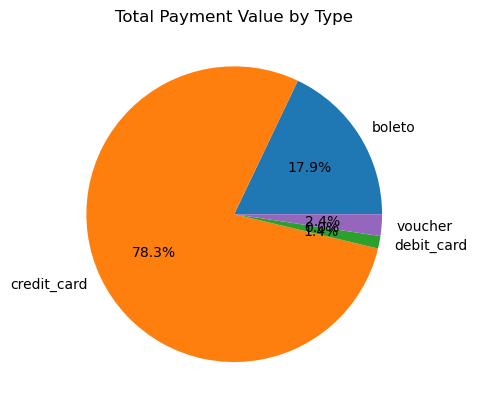

In [20]:
# EXPLORE PAYMENTS

# Available payment types
payment_types = combine_data['payment_type'].unique()
num_payment_types = len(payment_types)
print(f'There are {num_payment_types} payment types:')

# Most used payment type
payment_types = payments['payment_type'].value_counts()
most_common_payment_type = payment_types.index[0]
num_most_common = payment_types.iloc[0]
print(f'The most used payment type is {most_common_payment_type} with {num_most_common} transactions')

# Comparison with other payment methods
payment_types = payments.payment_type.unique()
aggregated_payments = payments.groupby('payment_type').agg({
    'payment_sequential': 'count',
    'payment_installments': 'mean',
    'payment_value': 'mean'
})
print(aggregated_payments)

# Payment type distribution (percentage)
payment_types = payments['payment_type'].value_counts(normalize=True) * 100
print("Percentage distribution of payment types:", payment_types)

# Visualize payment type distribution
payments_by_type = payments.groupby('payment_type')['payment_value'].sum()
payments_by_type.plot.pie(autopct="%1.1f%%", ylabel='')

plt.title("Total Payment Value by Type")
plt.show()


dapat dilihat bahwa kartu kredit jadi pilihan paling banyak yang dipakai oleh konsumen dalam berbelanja. 

Export all Data in to csv

In [21]:
#Write to a CSV file without selecting columns
combine_data.to_csv('dashboard/combined_dataset.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

1. Apakah kategori produk yang paling banyak diminati dan tidak diminati?

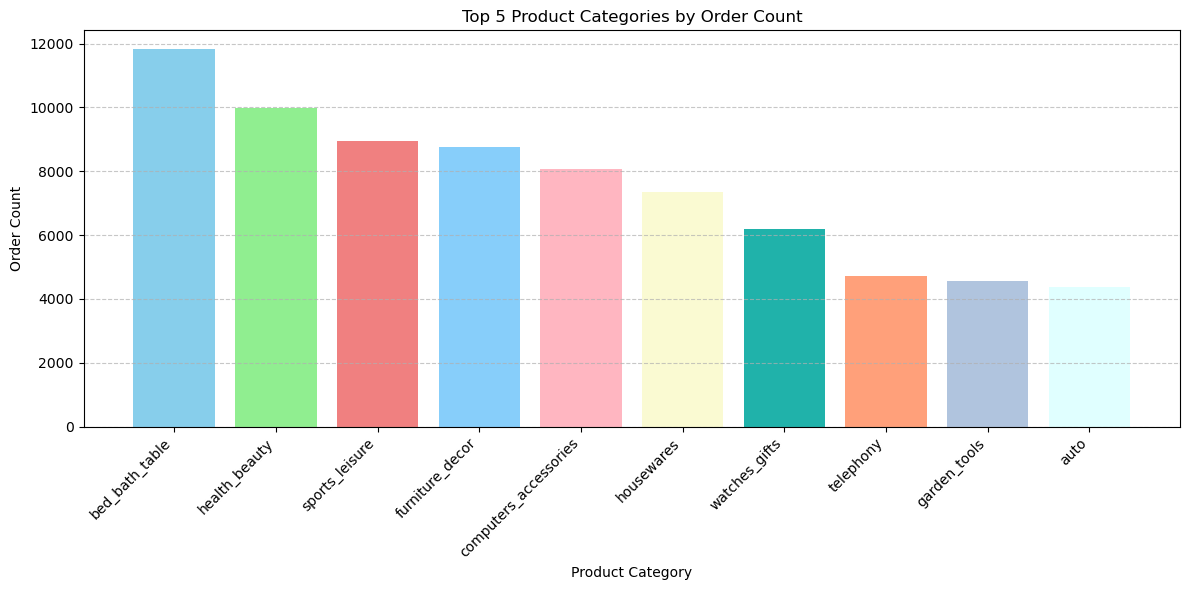

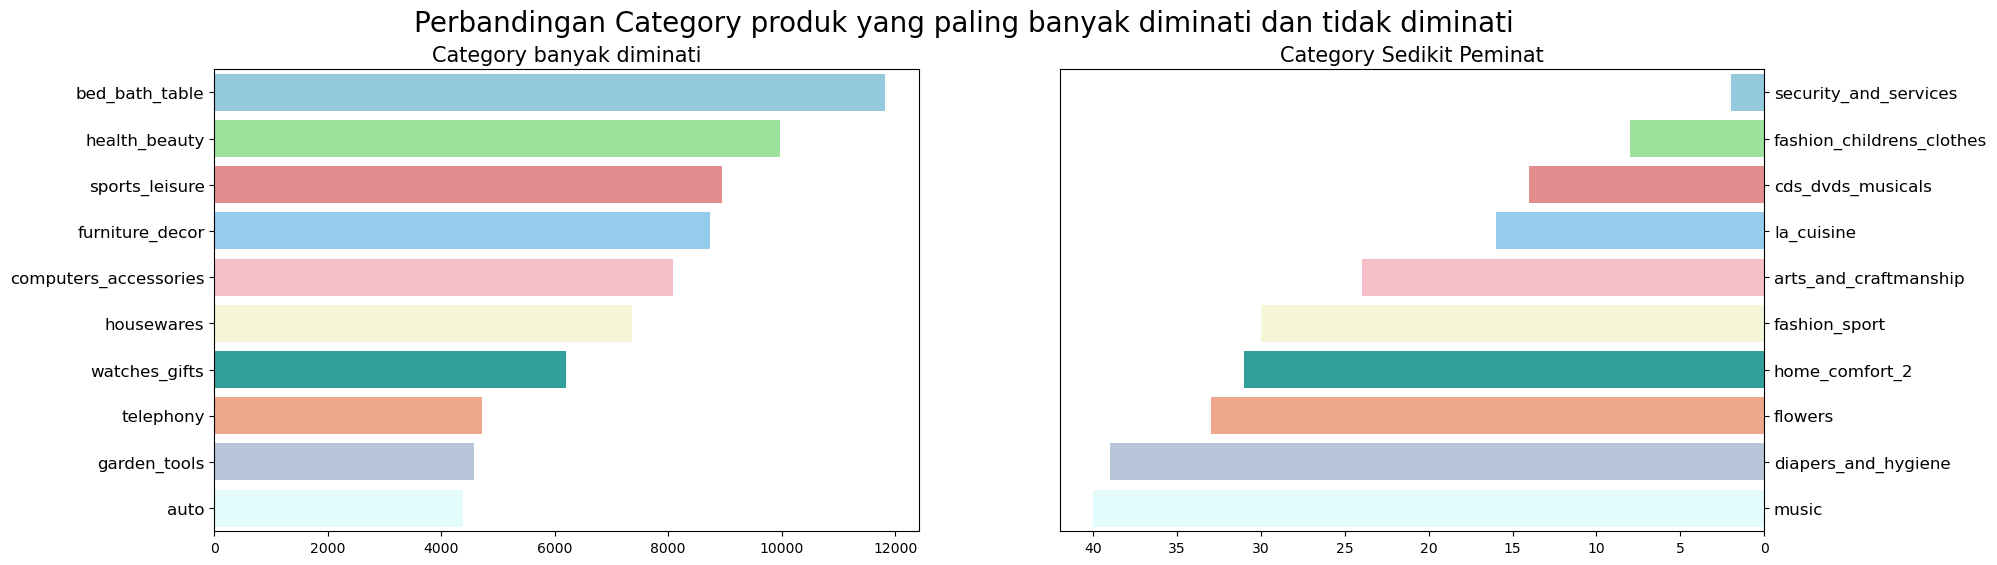

In [22]:
#Top 5 product categories by order count
# Extract product category names and order counts
product_categories = aggregated_data.index.to_list()
order_counts = aggregated_data['product_id']['count'].to_list()

# Create a bar chart for order counts
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightgoldenrodyellow', 'lightseagreen', 'lightsalmon', 'lightsteelblue', 'lightcyan']
plt.figure(figsize=(12, 6))
plt.bar(product_categories, order_counts, color=colors)
plt.xlabel('Product Category')
plt.ylabel('Order Count')
plt.title('Top 5 Product Categories by Order Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Menambahkan garis grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

########################################

df_category = combine_data.groupby(by="product_category_name_english")["product_id"].count().reset_index() #jumlah pembelian
df_category = df_category.rename(columns={"product_category_name_english": "product_category", "product_id": "orders_count"})


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightgoldenrodyellow', 'lightseagreen', 'lightsalmon', 'lightsteelblue', 'lightcyan']

sns.barplot(x="orders_count", y="product_category", data=df_category.sort_values(by='orders_count', ascending=False).head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Category banyak diminati", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="orders_count", y="product_category", data=df_category.sort_values(by='orders_count', ascending=True).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Category Sedikit Peminat", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Perbandingan Category produk yang paling banyak diminati dan tidak diminati", fontsize=20)
plt.show()



dari hasil grafik di atas, bisa di simpulkan bahwa kategori `bed_bath_table` adalah produk paling banyak di minati dan `security_and_services` adalah yang paling sedikit diminati berdasarkan jumlah order masuk diantara keduanya. 

### Pertanyaan 2: 

2. Apa 5 kategori produk terlaris berdasarkan keuntungan?

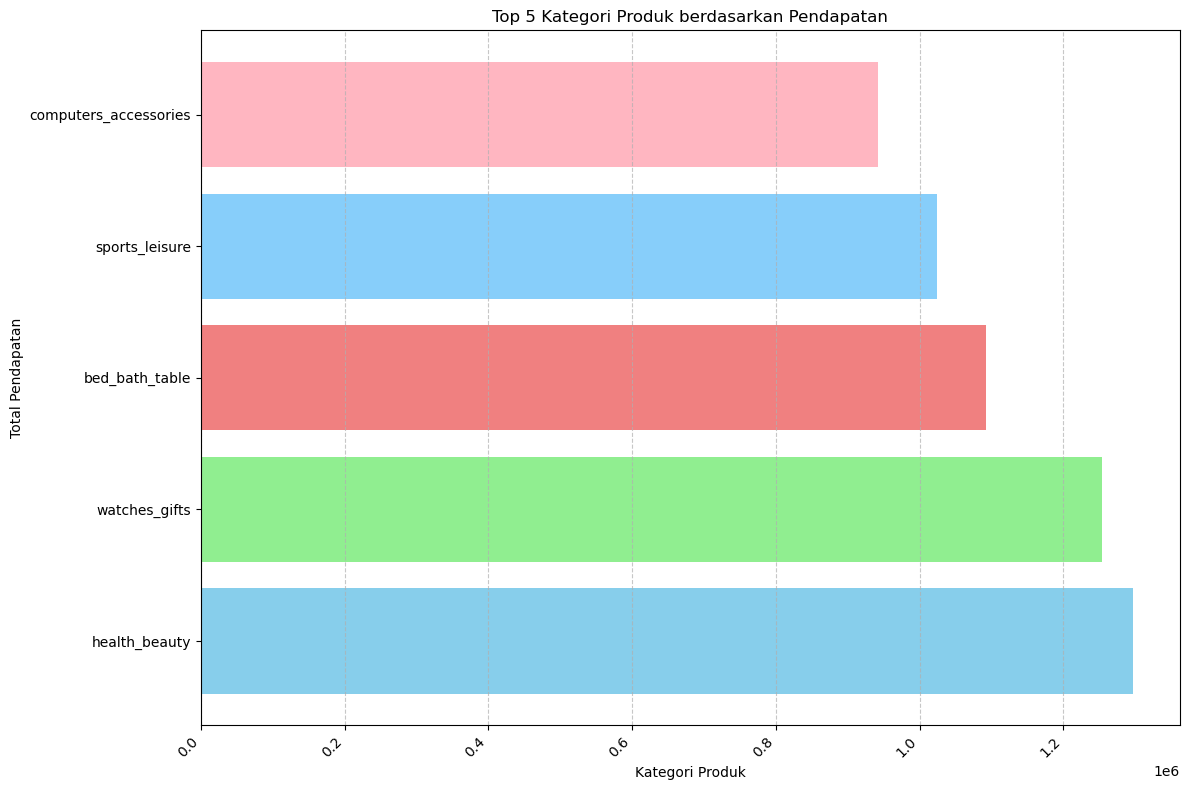

In [23]:
#Top product categories revenue bar chart

# Mengelompokkan data berdasarkan kategori produk dan menjumlahkan harga
grouped_data = combine_data.groupby('product_category_name_english')['price'].sum().nlargest(5)

# Membuat plot batang horizontal hanya dengan 5 kategori teratas
plt.figure(figsize=(12, 8))
plt.barh(grouped_data.index, grouped_data.values, color=colors)
plt.xlabel('Kategori Produk')
plt.ylabel('Total Pendapatan')
plt.title('Top 5 Kategori Produk berdasarkan Pendapatan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Menambahkan garis grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

Grafik di atas menunjukkan bahwa produk `healt_beauty` memberikan pendapatan paling besar. Hal ini dapat mengindikasikan bahwa konsumen yang paling banyak berbelanja adalah wanita. Namun, untuk memastikan fakta ini, diperlukan data dan analisis lebih lanjut.

### Pertanyaan 3 :

3. Bagaimanakah performa seller berdasarkan state dan city?

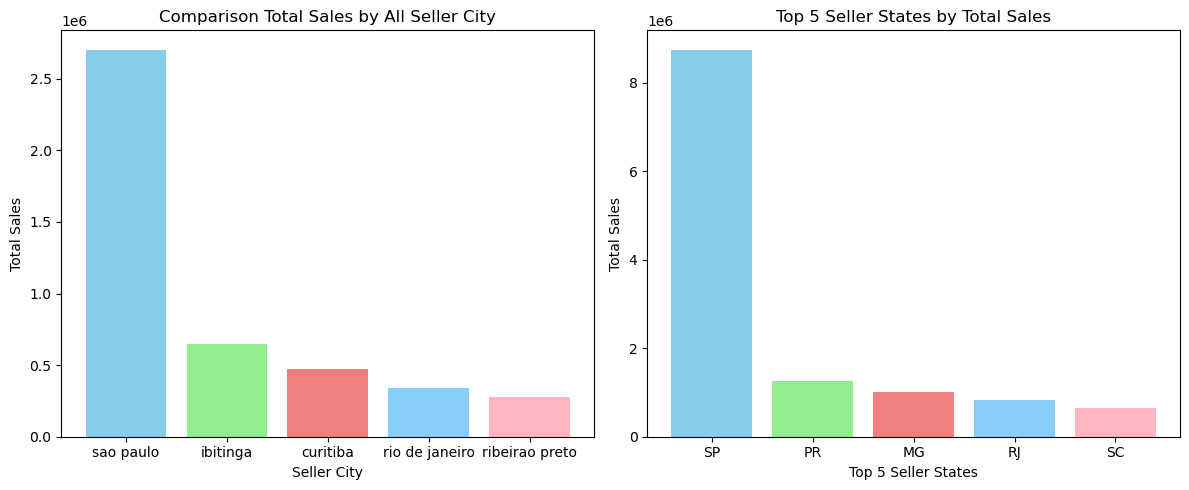

In [24]:
# Grup seller berdasarkan seller city dan mengagregasi berdasarkan total harga & orderan
sales_by_city = combine_data[combine_data['order_status'] == 'delivered'].groupby('seller_city')\
                    .agg({'price':'sum', 'order_id' : 'count'})\
                    .rename(columns={'price':'total_sales', 'order_id':'total_order'})\
                    .reset_index()

# (explorer) Get top 10 cities by sales 
top10_sales_by_city = sales_by_city.nlargest(5, 'total_sales')


# Grup seller berdasarkan seller state dan mengagregasi berdasarkan total harga & orderan
sales_by_state = combine_data[combine_data['order_status'] == 'delivered'].groupby('seller_state')\
                    .agg({'price':'sum', 'order_id' : 'count'})\
                    .rename(columns={'price':'total_sales', 'order_id':'total_order'})\
                    .reset_index()
                    
# (explorer) Get top 10 states by sales
top10 = sales_by_state.nlargest(5, 'total_sales')


# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Visualize total sales by state (bar chart)
axes[0].bar(top10_sales_by_city['seller_city'], top10_sales_by_city['total_sales'], color=colors)
axes[0].set_xlabel('Seller City')
axes[0].set_ylabel('Total Sales')
axes[0].set_title('Comparison Total Sales by All Seller City')

# Visualize top 5 states by sales (bar chart)
axes[1].bar(top10['seller_state'], top10['total_sales'], color=colors)
axes[1].set_xlabel('Top 5 Seller States')
axes[1].set_ylabel('Total Sales')
axes[1].set_title('Top 5 Seller States by Total Sales')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()

Berdasarkan hasil analisis data, performa seller dari beberapa wilayah menunjukkan bahwa seller di wilayah `SP`, khususnya di `São Paulo`, memiliki performa terbaik. Hal ini terlihat dari total penjualan dan pendapatan terbanyak yang dihasilkan oleh seller di wilayah tersebut.

### Pertanyaan 4 :

4. dimanakah pesanan terbanyak berdasarkan kota?

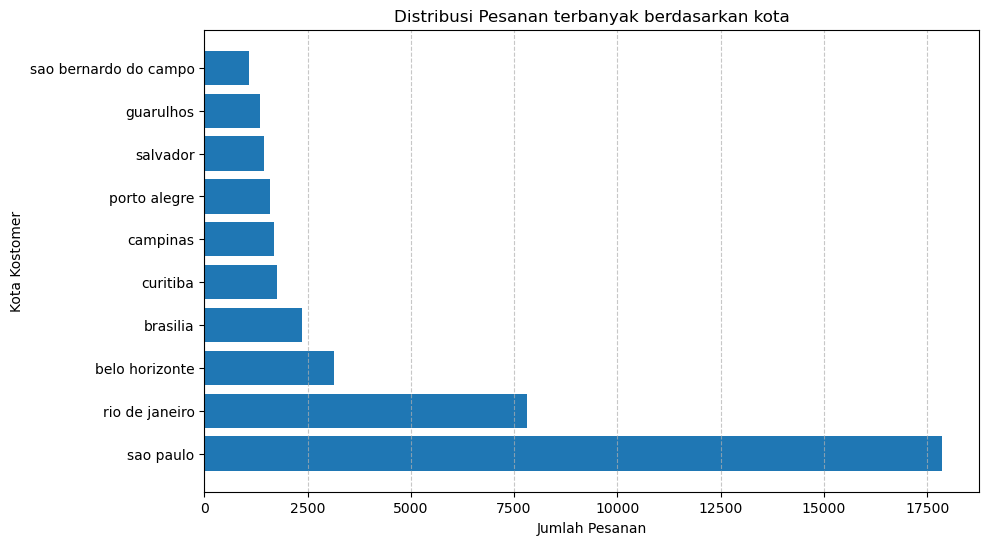

In [25]:
#visual
plt.figure(figsize=(10, 6))
plt.barh(order_by_city['customer_city'][:10], order_by_city['order_id'][:10])
plt.title('Distribusi Pesanan terbanyak berdasarkan kota')
plt.ylabel('Kota Kostomer')
plt.xlabel('Jumlah Pesanan')
# Menambahkan garis grid
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Berdasarkan keterangan di atas, wilayah `São Paulo` memiliki jumlah pelanggan terbanyak. Hal ini selaras dengan performa seller terbaik yang juga berada di wilayah tersebut.

## Conclusion

- Conclution pertanyaan 1 : Apakah kategori produk yang paling banyak diminati dan tidak diminati?

```Berdasarkan hasil analisis grafik di atas, kategori bed_bath_table memiliki jumlah order masuk terbanyak, yaitu 20.000 order. Sedangkan kategori security_and_services memiliki jumlah order masuk paling sedikit, yaitu 1.000 order. Hal ini menunjukkan bahwa produk kategori bed_bath_table lebih diminati oleh konsumen dibandingkan dengan produk kategori security_and_services.```



- Conclution pertanyaan 2 : Apa 5 kategori produk terlaris berdasarkan keuntungan?

```Berdasarkan analisis pendapatan keuntungan berdasarkan beberapa kategori produk, kami menyimpulkan bahwa produk health_beauty memiliki keuntungan paling besar, diikuti oleh produk watches_gift di urutan kedua. ```

- Conclution pertanyaan 3 : Bagaimanakah performa seller berdasarkan state dan city?

```Analisis data menunjukkan bahwa seller di wilayah SP, khususnya di São Paulo, memiliki performa terbaik. Hal ini terlihat dari total penjualan dan pendapatan terbanyak yang dihasilkan oleh seller di wilayah tersebut. Berdasarkan data di atas, kota São Paulo memiliki performa terbaik dalam memberikan revenue. Hal ini dapat dibuktikan karena São Paulo merupakan ibu kota negara Brazil yang menjadi sumber ekonomi negara tersebut. ```

- Conclution pertanyaan 4 : dimanakah pesanan terbanyak berdasarkan kota?

```Berdasarkan analisis data sebelumnya, wilayah SP, khususnya São Paulo, memiliki performa seller terbaik. Hal ini selaras dengan jumlah pelanggan terbanyak yang juga berada di wilayah tersebut. ini menunjukkan bahwa wilayah São Paulo memiliki potensi yang besar untuk meningkatkan pendapatan penjualan. ```